In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 300)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import matplotlib.pyplot as plt
#plt.style.use('darkgrid')
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('Base Dados OS BI.xlsx', sheet_name = 'D.DSILVA', parse_dates=False)
df.head(2)

,Equipamento,Denominação do objeto técnico,TIPO EQUIPAMENTO,Ordem,Nota,Denominação do loc.instalação,Tipo de nota,Data da nota,Descrição,SISTEMA,SUBSISTEMA,Parada,Início avaria,Hora início avaria,Fim da avaria,Hora do fim avaria,Duração da parada,PERIODO,Frente,Turno 1,Turno 2
0,300323,TRATOR PNEU JOHN DEERE 8270R,TRATOR,60677882.0,700535692,COLHEITA MECANIZADA,A2,2021-12-30,TROCAR BATERIA,ELETRICO,BATERIA,X,2021-12-30,07:30:06,2022-12-05,07:00:00,8159.50,SF 21/22,FRENTE MEC 4,A,7
1,300256,TRATOR PNEU VALTRA BT 210,TRATOR,60678372.0,700557661,SEM ALOCAÇÃO,A2,2022-02-15,TROCAR VALVULA 2-VIAS DANIFICADA,PNEUMATICO,VALVULA,X,2022-02-15,00:50:00,2022-12-15,15:00:00,7286.17,SF 21/22,Frente Outros,C,0


#### Ajustando nome das colunas

In [3]:
print(df.columns)

Index(['Equipamento', 'Denominação do objeto técnico', 'TIPO EQUIPAMENTO',
       'Ordem', 'Nota', 'Denominação do loc.instalação', 'Tipo de nota',
       'Data da nota', 'Descrição', 'SISTEMA', 'SUBSISTEMA', 'Parada',
       'Início avaria', 'Hora início avaria', 'Fim da avaria',
       'Hora do fim avaria', 'Duração da parada', 'PERIODO', 'Frente',
       'Turno 1', 'Turno 2'],
      dtype='object')


In [4]:
df = df.set_axis(['EQP', 'OBJ_TEC', 'TIPO_EQP',
       'ORDEM', 'NOTA', 'LOC_INST', 'TIPO_NOTA',
       'DATA_NOTA', 'DESC_NOTA', 'SISTEMA', 'SUBSISTEMA', 'PARADA',
       'INICIO_AVARIA', 'H_INICIO_AVARIA', 'FIM_AVARIA',
       'H_FIM_AVARIA', 'DURACAO_PARADA', 'PERIODO', 'FRENTE',
       'TURNO1', 'TURNO2'], axis=1)

### Junção dos campos que contém data e hora

In [ ]:
df['FIM_AVARIA_H'] = pd.to_datetime(df['FIM_AVARIA'].astype('str') + ' '+df['H_FIM_AVARIA'].astype('str'))
df = df.drop(['FIM_AVARIA','H_FIM_AVARIA'], axis=1)
df['INICIO_AVARIA_H'] = pd.to_datetime(df['INICIO_AVARIA'].astype('str') + ' '+df['H_INICIO_AVARIA'].astype('str'))
df = df.drop(['INICIO_AVARIA','H_INICIO_AVARIA'], axis=1)

#### Checa visualmente os valores nulos do dataframe

Text(0.5, 1.0, 'Valores Faltantes')

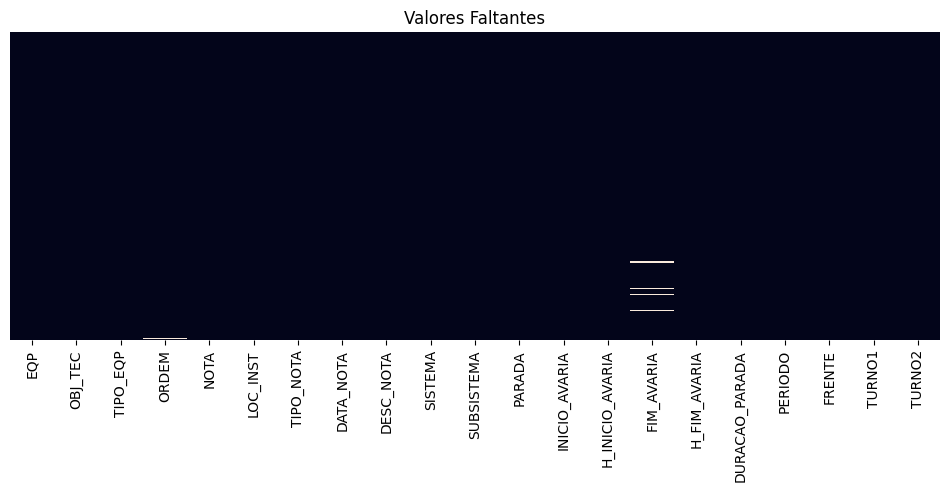

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title('Valores Faltantes')

#### Remover linhas que não tenham uma data de conclusão da ordem aberta

In [6]:
df = df[(~df['FIM_AVARIA'].isna() & ~df['ORDEM'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EQP              6550 non-null   int64         
 1   OBJ_TEC          6550 non-null   object        
 2   TIPO_EQP         6550 non-null   object        
 3   ORDEM            6550 non-null   float64       
 4   NOTA             6550 non-null   int64         
 5   LOC_INST         6550 non-null   object        
 6   TIPO_NOTA        6550 non-null   object        
 7   DATA_NOTA        6550 non-null   datetime64[ns]
 8   DESC_NOTA        6550 non-null   object        
 9   SISTEMA          6550 non-null   object        
 10  SUBSISTEMA       6550 non-null   object        
 11  PARADA           6550 non-null   object        
 12  INICIO_AVARIA    6550 non-null   datetime64[ns]
 13  H_INICIO_AVARIA  6550 non-null   object        
 14  FIM_AVARIA       6550 non-null   datetim

In [7]:
df_categorical_stats  = df.describe(include=['O'],datetime_is_numeric=True).T.reset_index()
df_categorical_stats = df_categorical_stats.sort_values('unique')
display(df_categorical_stats)
df = df.drop('PARADA', axis=1)

,index,count,unique,top,freq
7,PARADA,6550,1,X,6550
1,TIPO_EQP,6550,2,COLHEDORA,3675
3,TIPO_NOTA,6550,2,A2,6477
10,PERIODO,6550,2,SF 21/22,4927
12,TURNO1,6550,3,A,2790
2,LOC_INST,6550,6,COLHEITA MECANIZADA,4776
11,FRENTE,6550,9,Frente Outros,1325
0,OBJ_TEC,6550,14,COLHEDORA CANA JD CH570 01 LINHA,3297
5,SISTEMA,6550,35,ELETRICO,1280
6,SUBSISTEMA,6550,152,MANGUEIRA,643


#### Checagem categóricas

In [68]:
df_plot_flex = df
df_tipo_eqp = df_plot_flex[['TIPO_EQP','TIPO_NOTA']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_eqp_per = df_plot_flex[['TIPO_EQP','PERIODO']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_eqp_tur = df_plot_flex[['TIPO_EQP','TURNO1']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_eqp_loc = df_plot_flex[['TIPO_EQP','LOC_INST']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_eqp_fr = df_plot_flex[['TIPO_EQP','FRENTE']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_eqp_ob_tec = df_plot_flex[['TIPO_EQP','OBJ_TEC']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)

df_tipo_nota_per = df_plot_flex[['TIPO_NOTA','PERIODO']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_nota_tur = df_plot_flex[['TIPO_NOTA','TURNO1']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_nota_loc = df_plot_flex[['TIPO_NOTA','LOC_INST']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_nota_frente = df_plot_flex[['TIPO_NOTA','FRENTE']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
df_tipo_nota_obtec = df_plot_flex[['TIPO_NOTA','OBJ_TEC']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)


#df_tipo_nota = df_plot_flex[['TIPO_NOTA','PERIODO']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)

##
# df_tipo_nota = df_plot_flex['TIPO_NOTA'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_tipo_periodo = df_plot_flex['PERIODO'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_tipo_turno = df_plot_flex['TURNO1'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_tipo_frente= df_plot_flex['FRENTE'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_tipo_obj_tec= df_plot_flex['OBJ_TEC'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_sistema= df_plot_flex['SISTEMA'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)
# df_loc= df_plot_flex['LOC_INST'].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)


Text(0.5, 0, 'Tipo Nota')

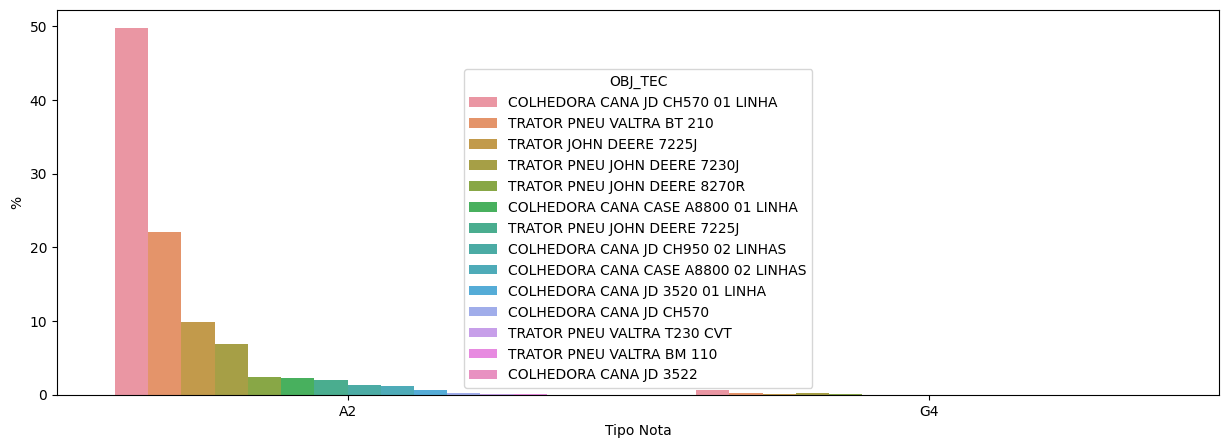

In [76]:
f, ax = plt.subplots(figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_tipo_nota_obtec, x='TIPO_NOTA', y='%',hue='OBJ_TEC')
ax.set_xlabel('Tipo Nota')


Text(0.5, 0, 'Tipo Eqp')

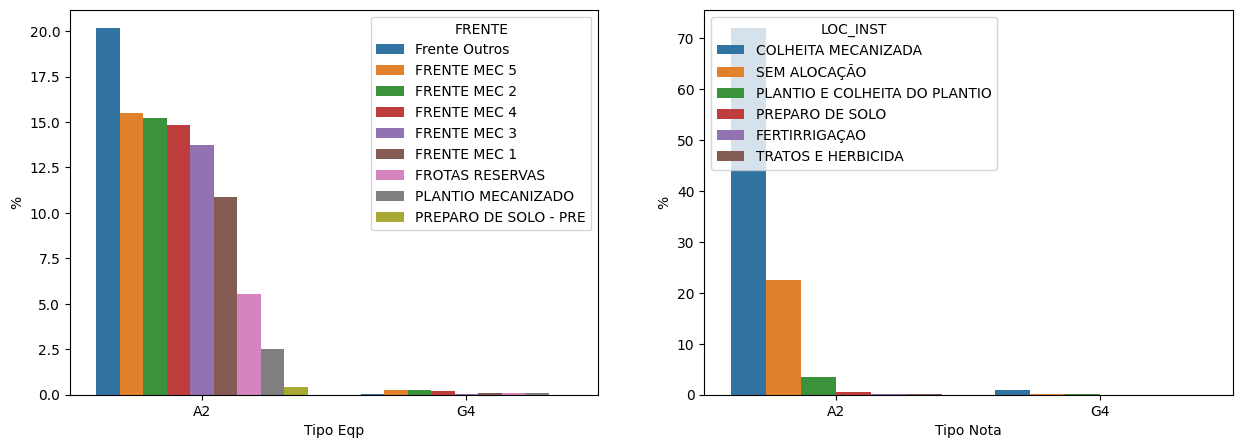

In [75]:
f, ax = plt.subplots(1,2,figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_tipo_nota_loc, x='TIPO_NOTA', y='%',hue='LOC_INST', ax=ax[1])
ax[1].set_xlabel('Tipo Nota')
sns.barplot(data=df_tipo_nota_frente, x='TIPO_NOTA', y='%',hue='FRENTE', ax=ax[0])
ax[0].set_xlabel('Tipo Eqp')

Text(0.5, 0, 'Tipo Eqp')

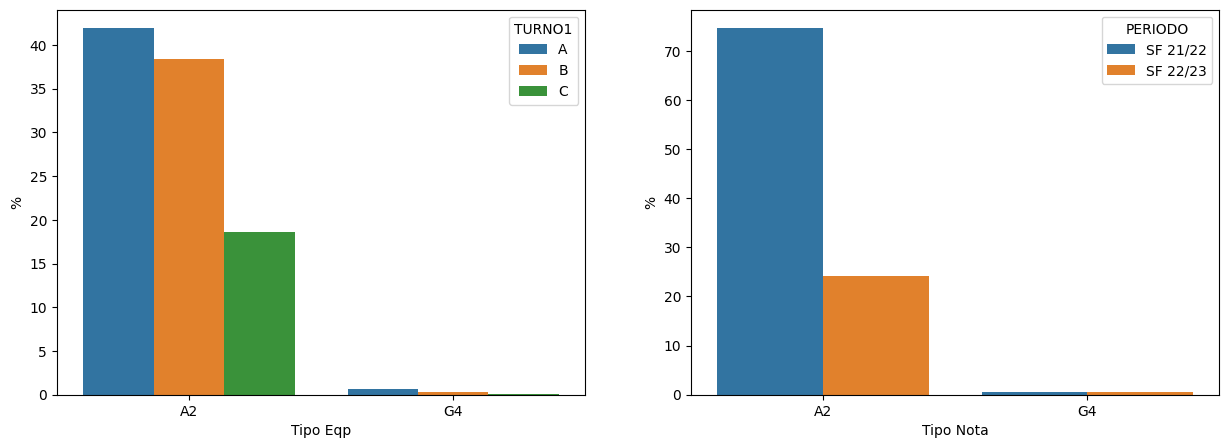

In [74]:
f, ax = plt.subplots(1,2,figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_tipo_nota_per, x='TIPO_NOTA', y='%',hue='PERIODO', ax=ax[1])
ax[1].set_xlabel('Tipo Nota')
sns.barplot(data=df_tipo_nota_tur, x='TIPO_NOTA', y='%',hue='TURNO1', ax=ax[0])
ax[0].set_xlabel('Tipo Eqp')

Text(0.5, 0, 'Tipo Eqp')

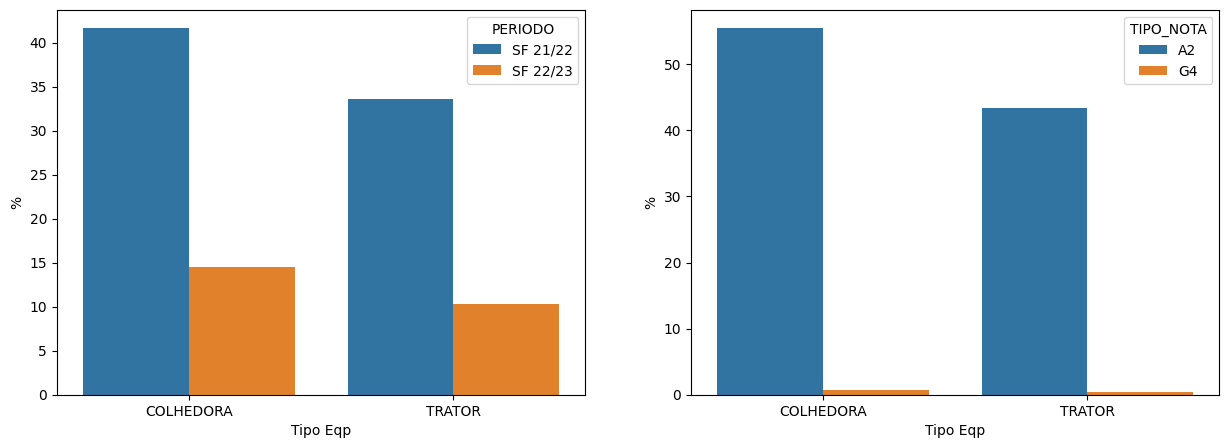

In [54]:
f, ax = plt.subplots(1,2,figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_tipo_eqp, x='TIPO_EQP', y='%',hue='TIPO_NOTA', ax=ax[1])
ax[1].set_xlabel('Tipo Eqp')
sns.barplot(data=df_tipo_eqp_per, x='TIPO_EQP', y='%',hue='PERIODO', ax=ax[0])
ax[0].set_xlabel('Tipo Eqp')

Text(0.5, 0, 'Tipo Eqp')

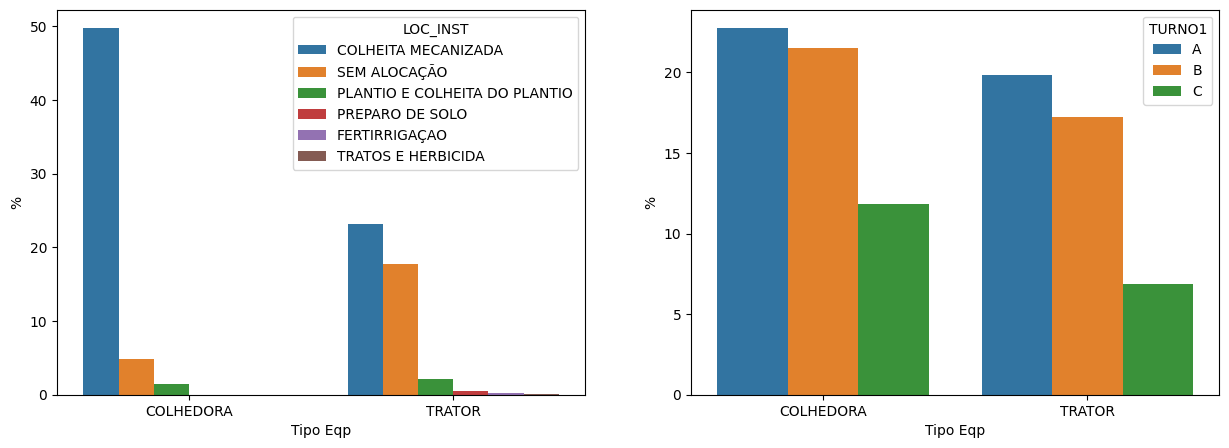

In [58]:
f, ax = plt.subplots(1,2,figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_tipo_eqp_tur, x='TIPO_EQP', y='%',hue='TURNO1', ax=ax[1])
ax[1].set_xlabel('Tipo Eqp')
sns.barplot(data=df_tipo_eqp_loc, x='TIPO_EQP', y='%',hue='LOC_INST', ax=ax[0])
ax[0].set_xlabel('Tipo Eqp')

Text(0.5, 0, 'Tipo Eqp')

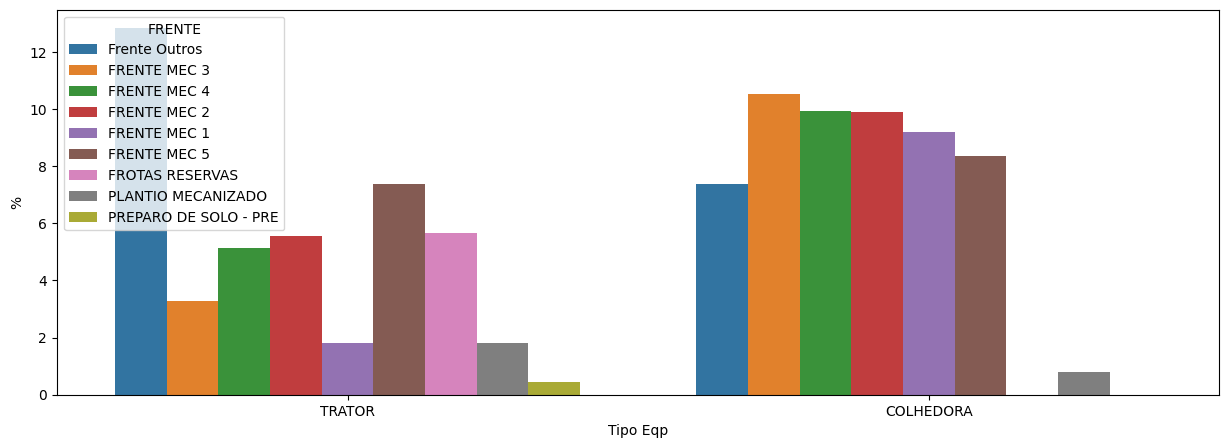

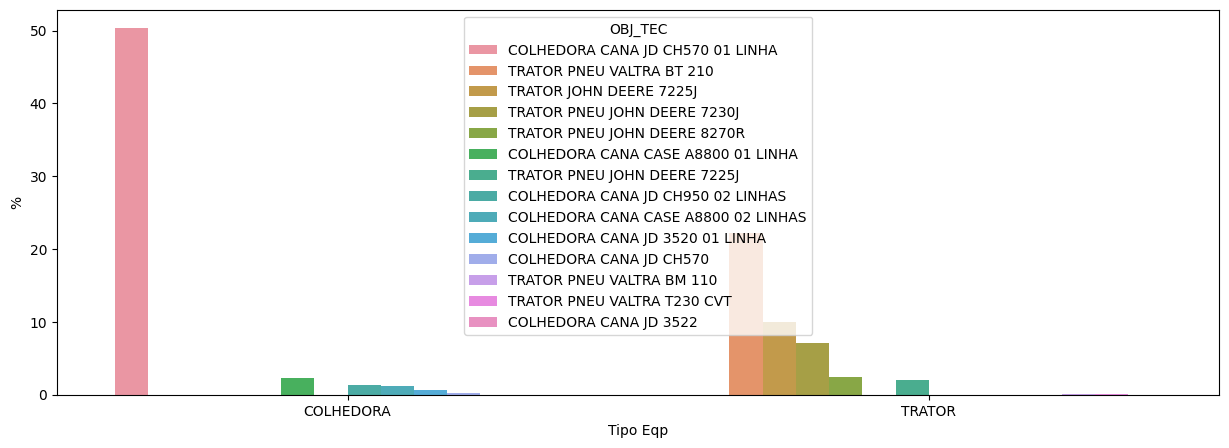

In [73]:
f, ax = plt.subplots(figsize=(15,5))
f.subplots_adjust(hspace=1, wspace=2)
sns.barplot(data=df_tipo_eqp_fr, x='TIPO_EQP', y='%',hue='FRENTE')
ax.set_xlabel('Tipo Eqp')

f, ax = plt.subplots(figsize=(15,5))
f.subplots_adjust(hspace=1, wspace=2)
sns.barplot(data=df_tipo_eqp_ob_tec, x='TIPO_EQP', y='%',hue='OBJ_TEC')
ax.set_xlabel('Tipo Eqp')

### Junção dos campos que contém data e hora

In [ ]:
df['FIM_AVARIA_H'] = pd.to_datetime(df['FIM_AVARIA'].astype('str') + ' '+df['H_FIM_AVARIA'].astype('str'))
df = df.drop(['FIM_AVARIA','H_FIM_AVARIA'], axis=1)
df['INICIO_AVARIA_H'] = pd.to_datetime(df['INICIO_AVARIA'].astype('str') + ' '+df['H_INICIO_AVARIA'].astype('str'))
df = df.drop(['INICIO_AVARIA','H_INICIO_AVARIA'], axis=1)

In [ ]:
#df_plot_flex = df[df['LOC_INST'] == 'COLHEITA MECANIZADA']

In [ ]:

# sns.barplot(data=df_tipo_nota, x='index', y='%',ax=ax[0,1])
# ax[0,1].set_xlabel('Tipo Nota')
# sns.barplot(data=df_tipo_periodo, x='index', y='%',ax=ax[0,2])
# ax[0,2].set_xlabel('Periodo')

# ## linha 2
# sns.barplot(data=df_tipo_frente, x='index', y='%',ax=ax[1,0])
# ax[1,0].set_xlabel('Frente')
# ax[1,0].tick_params(axis='x', rotation=90)
# sns.barplot(data=df_tipo_obj_tec, x='index', y='%',ax=ax[1,1])
# ax[1,1].set_xlabel('Obj Tec')
# ax[1,1].tick_params(axis='x', rotation=90)
# sns.barplot(data=df_tipo_turno, x='index', y='%',ax=ax[1,2])
# ax[1,2].set_xlabel('Turno')

# f, ax = plt.subplots(figsize=(14,5))

# sns.barplot(data=df_sistema, x='index', y='%')
# ax.set_xlabel('Obj Tec')
# ax.tick_params(axis='x', rotation=90)

In [10]:
display(df['TIPO_EQP'].value_counts(normalize=True).to_frame())
display(df[['TIPO_EQP','TIPO_NOTA']].value_counts(normalize=True).to_frame())
display(df[['TIPO_EQP','TIPO_NOTA','PERIODO']].value_counts(normalize=True).to_frame())
display(df['TURNO1'].value_counts(normalize=True).to_frame())
display(df['FRENTE'].value_counts(normalize=True).to_frame())
display(df['OBJ_TEC'].value_counts(normalize=True).to_frame())
display(df['SISTEMA'].value_counts(normalize=True).to_frame()[:10])
display(df['SUBSISTEMA'].value_counts(normalize=True).to_frame()[:10])

,TIPO_EQP
COLHEDORA,0.561069
TRATOR,0.438931


,,0
TIPO_EQP,TIPO_NOTA,
COLHEDORA,A2,0.554656
TRATOR,A2,0.434198
COLHEDORA,G4,0.006412
TRATOR,G4,0.004733


0
TIPO_EQP  TIPO_NOTA PERIODO           
COLHEDORA A2        SF 21/22  0.413435
TRATOR    A2        SF 21/22  0.332977
COLHEDORA A2        SF 22/23  0.141221
TRATOR    A2        SF 22/23  0.101221
COLHEDORA G4        SF 22/23  0.003359
                    SF 21/22  0.003053
TRATOR    G4        SF 21/22  0.002748
                    SF 22/23  0.001985

,TURNO1
A,0.425954
B,0.387176
C,0.186870


,FRENTE
Frente Outros,0.202290
FRENTE MEC 5,0.157405
FRENTE MEC 2,0.154656
FRENTE MEC 4,0.150534
FRENTE MEC 3,0.137863
FRENTE MEC 1,0.110076
FROTAS RESERVAS,0.056489
PLANTIO MECANIZADO,0.026260
PREPARO DE SOLO - PRE,0.004427


,OBJ_TEC
COLHEDORA CANA JD CH570 01 LINHA,0.503359
TRATOR PNEU VALTRA BT 210,0.222595
TRATOR JOHN DEERE 7225J,0.099847
TRATOR PNEU JOHN DEERE 7230J,0.070992
TRATOR PNEU JOHN DEERE 8270R,0.024275
COLHEDORA CANA CASE A8800 01 LINHA,0.023206
TRATOR PNEU JOHN DEERE 7225J,0.020611
COLHEDORA CANA JD CH950 02 LINHAS,0.013435
COLHEDORA CANA CASE A8800 02 LINHAS,0.012214
COLHEDORA CANA JD 3520 01 LINHA,0.006260


,SISTEMA
ELETRICO,0.195420
HIDRAULICA,0.185954
MOTOR,0.133893
RODAGEM,0.066565
ELEVADOR,0.051756
AGUARDANDO MANUTENÇÃO,0.042595
PICADOR,0.041985
ESTRUTURA,0.038168
EIXO DIANTEIRO,0.037557
RODANTE,0.031908


,SUBSISTEMA
MANGUEIRA,0.098168
PNEU,0.064733
ALIMENTAÇÃO,0.060458
AR CONDICIONADO,0.049313
ARREFECIMENTO,0.045954
ESTEIRA,0.044580
AGUARDANDO MANUTENÇÃO,0.042595
TRANSMISSÃO,0.038015
CABINE,0.031603
PARTIDA,0.028550


In [11]:
df_per_tipoeqp_objtec_locinst = df[['TIPO_EQP','TIPO_NOTA','PERIODO','TURNO1','LOC_INST']].value_counts(normalize=True).to_frame().reset_index()
df_per_tipoeqp_objtec_locinst = df_per_tipoeqp_objtec_locinst.set_axis(['TIPO_EQP', 'TIPO_NOTA', 'PERIODO', 'TURNO1', 'LOC_INST', '%'], axis=1)
df_per_tipoeqp_objtec_locinst

,TIPO_EQP,TIPO_NOTA,PERIODO,TURNO1,LOC_INST,%
0,COLHEDORA,A2,SF 21/22,A,COLHEITA MECANIZADA,0.139542
1,COLHEDORA,A2,SF 21/22,B,COLHEITA MECANIZADA,0.134198
2,COLHEDORA,A2,SF 21/22,C,COLHEITA MECANIZADA,0.079084
3,TRATOR,A2,SF 21/22,A,COLHEITA MECANIZADA,0.072061
4,TRATOR,A2,SF 21/22,A,SEM ALOCAÇÃO,0.068702
5,TRATOR,A2,SF 21/22,B,COLHEITA MECANIZADA,0.064275
6,COLHEDORA,A2,SF 22/23,A,COLHEITA MECANIZADA,0.057252
7,TRATOR,A2,SF 21/22,B,SEM ALOCAÇÃO,0.056336
8,COLHEDORA,A2,SF 22/23,B,COLHEITA MECANIZADA,0.051603
9,COLHEDORA,A2,SF 22/23,C,COLHEITA MECANIZADA,0.029771


## Analisando a representatividade dos dados pelas categóricas

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\4192134154.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_per_parada_tipoeqp = df.groupby('TIPO_EQP').sum()['DURACAO_PARADA'].to_frame()


,TIPO_EQP,PERCENTUAL_DURACAO_PARADA
0,COLHEDORA,30.860587
1,TRATOR,69.139413


,TIPO_EQP,PERCENTUAL_QTD_NOTAS
0,COLHEDORA,56.10687
1,TRATOR,43.89313


Text(0, 0.5, 'Tempo Parada')

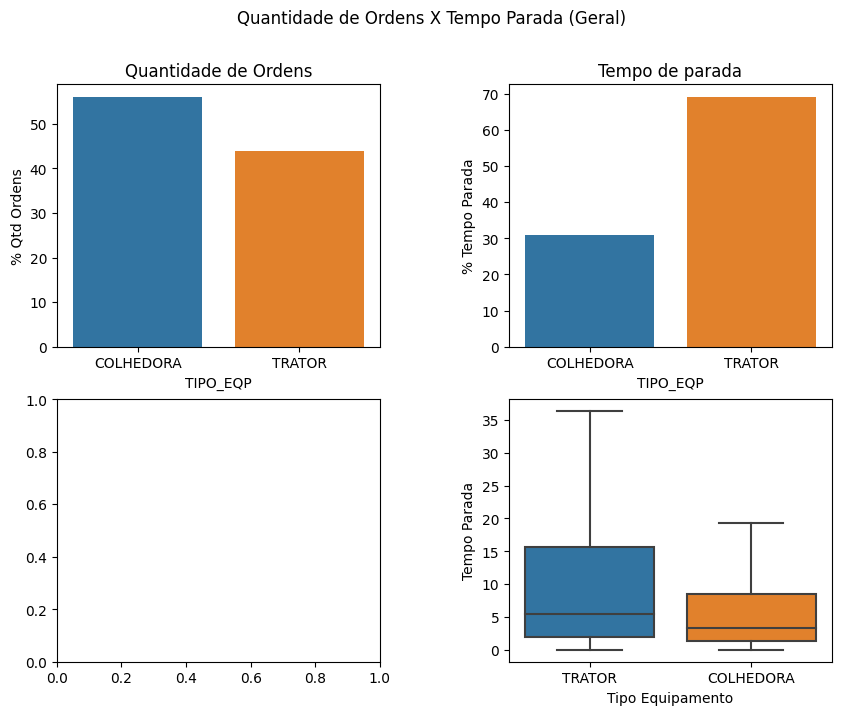

In [13]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
#https://towardsdatascience.com/how-xticks-and-xticklabels-really-work-a-walkthrough-aff80755838

df_per_tipoeqp = df.groupby('TIPO_EQP').count()['NOTA'].to_frame()
df_per_tipoeqp = df_per_tipoeqp.reset_index()
df_per_tipoeqp = df_per_tipoeqp.set_axis(['TIPO_EQP','PERCENTUAL_QTD_NOTAS'], axis=1)
df_per_tipoeqp['PERCENTUAL_QTD_NOTAS'] = (df_per_tipoeqp['PERCENTUAL_QTD_NOTAS'] / df['NOTA'].count())*100

df_per_parada_tipoeqp = df.groupby('TIPO_EQP').sum()['DURACAO_PARADA'].to_frame()
df_per_parada_tipoeqp = df_per_parada_tipoeqp.reset_index()
df_per_parada_tipoeqp = df_per_parada_tipoeqp.set_axis(['TIPO_EQP','PERCENTUAL_DURACAO_PARADA'], axis=1)
df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] = (df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] / df['DURACAO_PARADA'].sum())*100

display(df_per_parada_tipoeqp)
display(df_per_tipoeqp)

f, ax = plt.subplots(2,2,figsize=(10,7.5))
f.subplots_adjust(hspace=0.2, wspace=.4)
f.suptitle('Quantidade de Ordens X Tempo Parada (Geral)')

sns.barplot(x=df_per_tipoeqp['TIPO_EQP'], y=df_per_tipoeqp['PERCENTUAL_QTD_NOTAS'], ax = ax[0,0])
ax[0,0].set_ylabel('% Qtd Ordens')
ax[0,0].set_title('Quantidade de Ordens')

sns.barplot(x=df_per_parada_tipoeqp['TIPO_EQP'], y=df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'], ax = ax[0,1])
ax[0,1].set_ylabel('% Tempo Parada')
ax[0,1].set_title('Tempo de parada')

sns.boxplot(x=df['TIPO_EQP'], y=df['DURACAO_PARADA'], ax = ax[1,1], showfliers = False)
ax[1,1].set_xlabel('Tipo Equipamento')
ax[1,1].set_ylabel('Tempo Parada')

## Insight 1 
Manutenções em tratores levam mais tempo que as manutenções em colhedoras para equipamentos alocados na colheita mecanizada

In [14]:
df_per_tipoeqp = df.groupby('TIPO_EQP').count()['NOTA'].to_frame()
df_per_tipoeqp = df_per_tipoeqp.reset_index()
df_per_tipoeqp = df_per_tipoeqp.set_axis(['TIPO_EQP','PERCENTUAL_QTD_NOTAS'], axis=1)
df_per_tipoeqp['PERCENTUAL_QTD_NOTAS'] = (df_per_tipoeqp['PERCENTUAL_QTD_NOTAS'] / df['NOTA'].count())*100

df_per_parada_tipoeqp = df.groupby('TIPO_EQP').sum()['DURACAO_PARADA'].to_frame()
df_per_parada_tipoeqp = df_per_parada_tipoeqp.reset_index()
df_per_parada_tipoeqp = df_per_parada_tipoeqp.set_axis(['TIPO_EQP','PERCENTUAL_DURACAO_PARADA'], axis=1)
df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] = (df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] / df['DURACAO_PARADA'].sum())*100

display(df_per_parada_tipoeqp)
display(df_per_tipoeqp)

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\2050287230.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_per_parada_tipoeqp = df.groupby('TIPO_EQP').sum()['DURACAO_PARADA'].to_frame()


,TIPO_EQP,PERCENTUAL_DURACAO_PARADA
0,COLHEDORA,30.860587
1,TRATOR,69.139413


,TIPO_EQP,PERCENTUAL_QTD_NOTAS
0,COLHEDORA,56.10687
1,TRATOR,43.89313


### 
1.   Entender equipamentos para normalizar os que são iguais, porém, com nomenclatura diferente (OBJ_TEC)
2.   Extrair da coluna objeto técnico a marca e modelo dos equipamentos do equipamento (OBJ_TEC)
3.   Entender as notas e ordens que estão com informação de "SEM ALOCAÇÃO" (campo LOC_INST)
4.   Ajustar a alocação do equipamento na Frente correta baseado no histórico (FRENTE) pois atualmente todo o dataset recebe a ultima frente alocada para o equipamento e não é mantido um histórico
6.   Aprofundar no tema e entender Nota A2
7.   Porque na safra atual temos somente notas tipo G4?
8.   Aprofundar no tema e entender extração somente para manutenções que geram PARADAS. Para a análise todas tem que ser informadas, visão geral?

#### Checagem de quantidade 

<AxesSubplot: xlabel='index'>

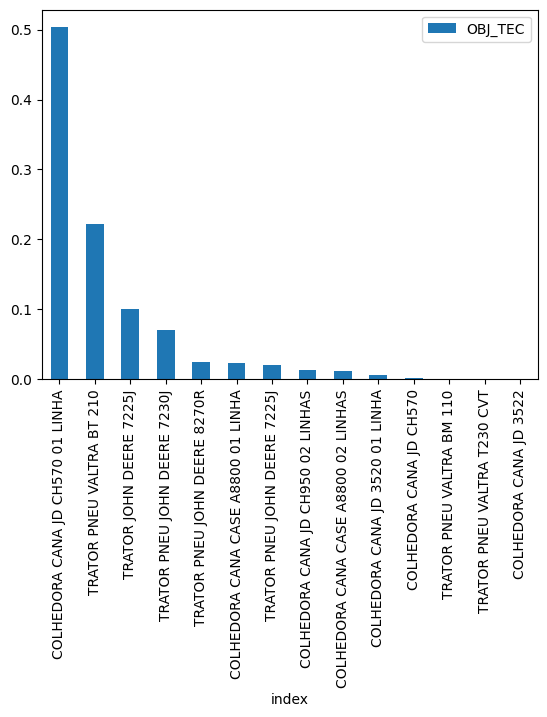

In [15]:
df['OBJ_TEC'].value_counts(normalize=True).reset_index().plot(kind='bar', x='index')

In [16]:
df_per_locinst = df['LOC_INST'].value_counts(normalize=True).to_frame()
df_per_locinst['LOC_INST'] = df_per_locinst['LOC_INST']*100
df_per_locinst

,LOC_INST
COLHEITA MECANIZADA,72.916031
SEM ALOCAÇÃO,22.656489
PLANTIO E COLHEITA DO PLANTIO,3.633588
PREPARO DE SOLO,0.473282
FERTIRRIGAÇAO,0.183206
TRATOS E HERBICIDA,0.137405


In [17]:
df_per_locinst = df[['FRENTE','PERIODO']].value_counts(normalize=True).to_frame()
df_per_locinst

,,0
FRENTE,PERIODO,
Frente Outros,SF 21/22,0.175725
FRENTE MEC 5,SF 21/22,0.113282
FRENTE MEC 4,SF 21/22,0.110687
FRENTE MEC 2,SF 21/22,0.106718
FRENTE MEC 3,SF 21/22,0.097557
FRENTE MEC 1,SF 21/22,0.077099
FRENTE MEC 2,SF 22/23,0.047939
FROTAS RESERVAS,SF 21/22,0.046412
FRENTE MEC 5,SF 22/23,0.044122


In [18]:
df_per_tipoeqp_objtec_locinst = df[['OBJ_TEC','TIPO_EQP','LOC_INST']].value_counts(normalize=True).to_frame()
df_per_tipoeqp_objtec_locinst.reset_index(inplace=True)
df_per_tipoeqp_objtec_locinst.set_axis(['OBJ_TEC','TIPO_EQP','LOC_INST','PER'], axis=1,inplace=True)
df_per_tipoeqp_objtec_locinst['PER'] = df_per_tipoeqp_objtec_locinst['PER']*100
df_per_tipoeqp_objtec_locinst

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\1959498048.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_per_tipoeqp_objtec_locinst.set_axis(['OBJ_TEC','TIPO_EQP','LOC_INST','PER'], axis=1,inplace=True)


,OBJ_TEC,TIPO_EQP,LOC_INST,PER
0,COLHEDORA CANA JD CH570 01 LINHA,COLHEDORA,COLHEITA MECANIZADA,48.427481
1,TRATOR PNEU VALTRA BT 210,TRATOR,SEM ALOCAÇÃO,13.832061
2,TRATOR PNEU VALTRA BT 210,TRATOR,COLHEITA MECANIZADA,8.137405
3,TRATOR JOHN DEERE 7225J,TRATOR,COLHEITA MECANIZADA,7.603053
4,TRATOR PNEU JOHN DEERE 7230J,TRATOR,COLHEITA MECANIZADA,5.419847
5,TRATOR JOHN DEERE 7225J,TRATOR,SEM ALOCAÇÃO,2.381679
6,TRATOR PNEU JOHN DEERE 8270R,TRATOR,COLHEITA MECANIZADA,1.984733
7,COLHEDORA CANA JD CH570 01 LINHA,COLHEDORA,SEM ALOCAÇÃO,1.877863
8,COLHEDORA CANA CASE A8800 01 LINHA,COLHEDORA,SEM ALOCAÇÃO,1.755725
9,TRATOR PNEU JOHN DEERE 7225J,TRATOR,PLANTIO E COLHEITA DO PLANTIO,1.664122


In [19]:
df_colh_mec = df[ (df['TIPO_EQP'] == 'COLHEDORA')  & (df['LOC_INST'] == 'COLHEITA MECANIZADA') ]
df_colh_mec.shape

(3260, 18)

In [20]:
df_per_tipoeqp_objtec_locinst = df_colh_mec[['OBJ_TEC','TIPO_EQP','LOC_INST','TIPO_NOTA']].value_counts(normalize=True).to_frame()
df_per_tipoeqp_objtec_locinst.reset_index(inplace=True)
df_per_tipoeqp_objtec_locinst.set_axis(['OBJ_TEC','TIPO_EQP','LOC_INST','TIPO_NOTA','PER_QTD'], axis=1,inplace=True)
df_per_tipoeqp_objtec_locinst['PER_QTD'] = df_per_tipoeqp_objtec_locinst['PER_QTD']*100
df_per_tipoeqp_objtec_locinst

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\3366092061.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_per_tipoeqp_objtec_locinst.set_axis(['OBJ_TEC','TIPO_EQP','LOC_INST','TIPO_NOTA','PER_QTD'], axis=1,inplace=True)


,OBJ_TEC,TIPO_EQP,LOC_INST,TIPO_NOTA,PER_QTD
0,COLHEDORA CANA JD CH570 01 LINHA,COLHEDORA,COLHEITA MECANIZADA,A2,96.073620
1,COLHEDORA CANA JD CH950 02 LINHAS,COLHEDORA,COLHEITA MECANIZADA,A2,2.668712
2,COLHEDORA CANA JD CH570 01 LINHA,COLHEDORA,COLHEITA MECANIZADA,G4,1.226994
3,COLHEDORA CANA JD CH950 02 LINHAS,COLHEDORA,COLHEITA MECANIZADA,G4,0.030675


## Filtrar somente colhedoras e colheita mecanizada e equipamento "COLHEDORA CANA JD CH570 01 LINHA" e TIPO_NOTA A2 pois detem 96% das ordens

In [21]:
df_colh_mec = df[(df['TIPO_EQP'] == 'COLHEDORA')  & (df['LOC_INST'] == 'COLHEITA MECANIZADA') & (df['OBJ_TEC'] == 'COLHEDORA CANA JD CH570 01 LINHA') & (df['TIPO_NOTA'] == 'A2')]

### Remove as colunas do dataset que estão com 1 único valor

In [22]:
#dropar colunas que tem somente 1 registro para todo o dataset
lista_colunas = df_colh_mec.columns.to_list()
lista_valor_unico_remover = []
for row in lista_colunas:
  if len(df_colh_mec[row].unique()) == 1:
    lista_valor_unico_remover.append(row)
print('Colunas removidas: ',lista_valor_unico_remover)
df_colh_mec.drop(columns=lista_valor_unico_remover,inplace=True)

Colunas removidas:  ['OBJ_TEC', 'TIPO_EQP', 'LOC_INST', 'TIPO_NOTA']


C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\817347539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colh_mec.drop(columns=lista_valor_unico_remover,inplace=True)


In [23]:
df_colh_mec.head(1)

,EQP,ORDEM,NOTA,DATA_NOTA,DESC_NOTA,SISTEMA,SUBSISTEMA,DURACAO_PARADA,PERIODO,FRENTE,TURNO1,TURNO2,FIM_AVARIA_H,INICIO_AVARIA_H
2,400069,60665165.0,700487716,2021-06-30,CORTE DE BASE (BASE),CORTE DE BASE,CORTE DE BASE,3463.89,SF 21/22,FRENTE MEC 3,A,8,2021-11-21 16:00:00,2021-06-30 08:06:31


In [24]:
df_colh_mec['DATA_NOTA_MES'] = df['DATA_NOTA'].dt.month
df_ano_mes = df_colh_mec[df_colh_mec['PERIODO']=='SF 21/22']
df_ano_mes = df_ano_mes.groupby(['DATA_NOTA_MES',
                                 ]).count()[['NOTA']]
df_ano_mes.reset_index(inplace=True)
fig = px.line(width=1200,
              height=500,
              x=df_ano_mes['DATA_NOTA_MES'],
              y=df_ano_mes["NOTA"],
              title='Quantidade de Notas por data de abertura'
              )
fig.show()

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\3455018186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colh_mec['DATA_NOTA_MES'] = df['DATA_NOTA'].dt.month


In [25]:
df_ano_mes = df_colh_mec[df_colh_mec['PERIODO']=='SF 21/22']
df_ano_mes = df_ano_mes.groupby(['DATA_NOTA_MES',
                                 'TURNO1'
                                 ]).count()[['NOTA']]
df_ano_mes.reset_index(inplace=True)
fig = px.line(width=1200,
              height=500,
              x=df_ano_mes['DATA_NOTA_MES'],
              color=df_ano_mes['TURNO1'],
              y=df_ano_mes["NOTA"],
              title='Quantidade de Notas por Período E Turno')
fig.show()

In [26]:
df_ano_mes = df_colh_mec[df_colh_mec['PERIODO']=='SF 21/22']
df_ano_mes = df_ano_mes.groupby(['DATA_NOTA_MES',
                                 'EQP'
                                 ]).count()[['NOTA']]
df_ano_mes.reset_index(inplace=True)
fig = px.line(width=1200,
              height=500,
              x=df_ano_mes['DATA_NOTA_MES'],
              color=df_ano_mes['EQP'],
              y=df_ano_mes["NOTA"],
              title='Quantidade de Notas por mês de abertura e Equipamento')
fig.show()

In [27]:
df_ano_mes_matriz = df_colh_mec[df_colh_mec['PERIODO']=='SF 21/22']
df_ano_mes_matriz = df_ano_mes_matriz.groupby(['DATA_NOTA_MES',
                                               'EQP'
                                 ]).count()[['NOTA']]
df_ano_mes_matriz.reset_index(inplace=True)
df_qtd_quebras = pd.pivot_table(df_ano_mes_matriz,index='EQP',values='NOTA',columns='DATA_NOTA_MES', aggfunc='sum', fill_value=0,margins=True,margins_name='All')
df_qtd_quebras.reset_index(inplace=True)
df_qtd_quebras.sort_values('All',ascending=False)
df_qtd_quebras

DATA_NOTA_MES,EQP,1,2,3,4,5,6,7,8,9,10,11,12,All
0,400067,0,4,12,7,2,26,1,21,24,10,13,2,122
1,400068,0,5,9,13,5,17,20,13,18,9,9,1,119
2,400069,1,0,9,15,6,17,0,0,0,0,6,3,57
3,400070,0,7,9,13,9,11,17,19,10,15,15,6,131
4,400082,0,7,9,14,4,16,14,14,0,7,4,0,89
5,400083,0,7,10,11,8,17,10,15,29,17,16,5,145
6,400084,0,6,10,3,3,11,13,13,19,16,11,2,107
7,400085,0,7,11,8,8,18,19,20,23,13,5,0,132
8,400098,0,6,8,9,5,12,17,11,18,11,24,2,123
9,400099,0,4,11,10,6,10,6,23,11,15,15,2,113


<H2> Análise da representatividade por Tempo de parada

C:\Users\kairo.oliveira\AppData\Local\Temp\6\ipykernel_1232\2385124403.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='TIPO_EQP', ylabel='PERCENTUAL_DURACAO_PARADA'>

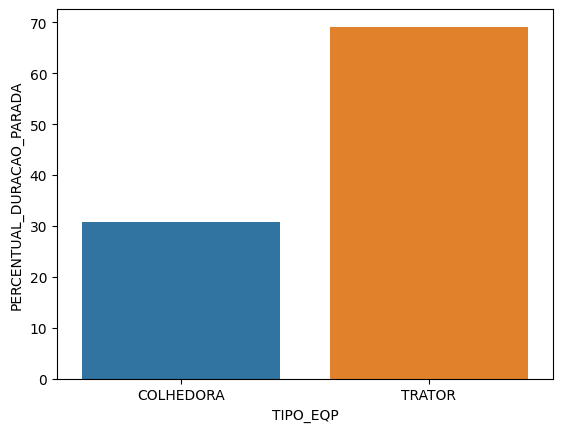

In [28]:
df_per_parada_tipoeqp = df.groupby('TIPO_EQP').sum()['DURACAO_PARADA'].to_frame()
df_per_parada_tipoeqp.reset_index(inplace=True)
df_per_parada_tipoeqp = df_per_parada_tipoeqp.set_axis(['TIPO_EQP','PERCENTUAL_DURACAO_PARADA'], axis=1)
df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] = (df_per_parada_tipoeqp['PERCENTUAL_DURACAO_PARADA'] / df['DURACAO_PARADA'].sum())*100

sns.barplot(df_per_parada_tipoeqp, x='TIPO_EQP', y='PERCENTUAL_DURACAO_PARADA')